# The outliers hunt



In [1]:
from mlpages_lib import *
%matplotlib inline

data = pd.read_csv('../data/exponential_growth_searches.csv', parse_dates=['Month'], skiprows=1) 

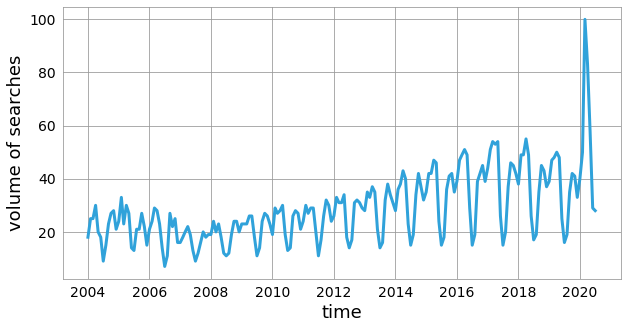

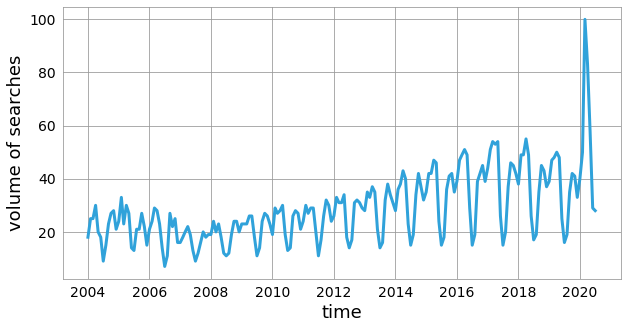

In [2]:
fig = plt.figure(figsize=(10, 5))
plt.plot(data.Month, data['exponential growth: (Worldwide)'], '-')
plt.ylabel('volume of searches')
plt.xlabel('time')
glue("expogrowth_fig_1", fig, display=False)

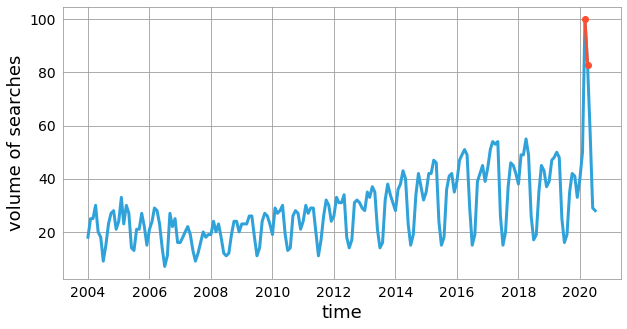

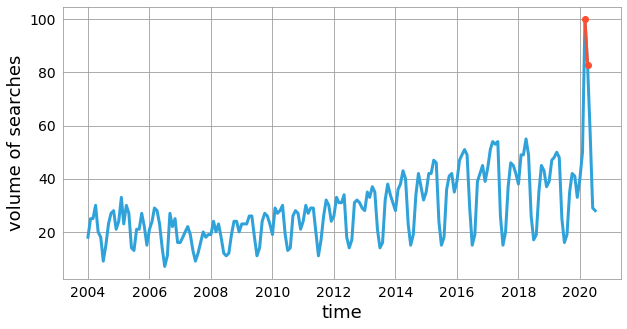

In [3]:
fig = plt.figure(figsize=(10, 5))

outliers = data['exponential growth: (Worldwide)'] > data['exponential growth: (Worldwide)'].mean()*2
plt.plot(data.Month, data['exponential growth: (Worldwide)'], '-')
plt.plot(data[outliers].Month, 
            data[outliers]['exponential growth: (Worldwide)'], '-o', color='C1')
plt.ylabel('volume of searches')
plt.xlabel('time')
glue("expogrowth_fig_1", fig, display=False)